## Covid-19 Predictions

This notebook is an attempt to predict Covid-19 cases in the coming days

Data is pulled from [here](https://github.com/CSSEGISandData/COVID-19).

### Part 1 - Read in Time Series Data

In [3]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

df = spark.read.csv("/evan/time_series_19-covid-Confirmed.csv", header = True, inferSchema=True)

display(df)

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,990,990
Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418,422,426,428,428
Chongqing,Mainland China,30.0572,107.874,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576
Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,296,296,296,296,296,296,296,296,296,296
Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,102,119,120,124,124
Guangdong,Mainland China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,1347,1348,1349,1349,1350,1350,1350,1351,1352,1352,1352,1352
Guangxi,Mainland China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,252,252,252,252,252,252,252,252,252,252,252,252
Guizhou,Mainland China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
Hainan,Mainland China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
Hebei,Mainland China,38.0428,114.5149,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,317,318,318,318,318,318,318,318,318,318,318,318


### Part 2 - Pull out South Korea Cases

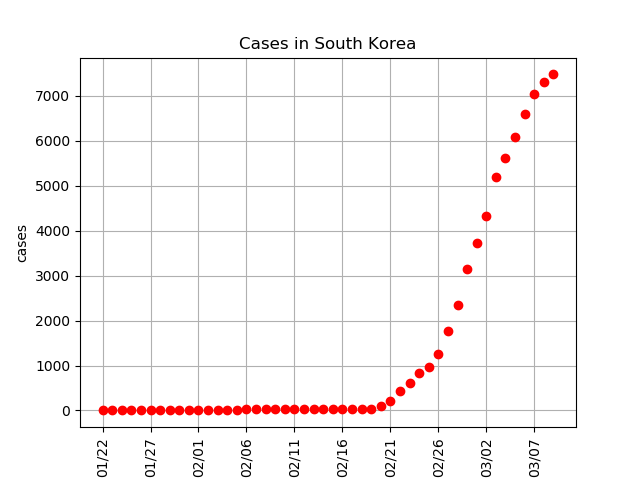

In [5]:
import numpy as np
from matplotlib import pyplot as plt

#This variable can be any country in the dataset, but remember that the country you compare with below should ideally be in a similar position (however you define that)
#Note that this country should have already 'peaked' in cases! (or be vary close to peaking)
country1_choice = "South Korea"

#Sum the cases and turn it into an array
country1 = df.drop('Province/State','Country/Region','Lat','Long').filter(col('Country/Region') == country1_choice).groupBy().sum()
country1_data = np.array(country1.collect())[0]

#Plot the data
x = np.arange(0, len(country1_data))
y = country1_data

fig, ax = plt.subplots()
ax.plot(x, y, 'ro')

ax.set_xticks(np.arange(0, len(country1_data), 5))
ax.set_xticklabels(['01/22','01/27','02/01','02/06','02/11','02/16','02/21','02/26','03/02','03/07','03/12','03/17','03/22','03/27','04/01','04/06', '04/11', '04/16','04/21','04/26','05/01'])
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('cases')
plt.grid(b=True)
plt.title('Cases in ' + country_choice)

display(fig)

### Part 3 - Fit a Logistic Curve to the Data

For justification as to why we're using a Logistic Curve, see [here](https://www.youtube.com/watch?v=Kas0tIxDvrg).

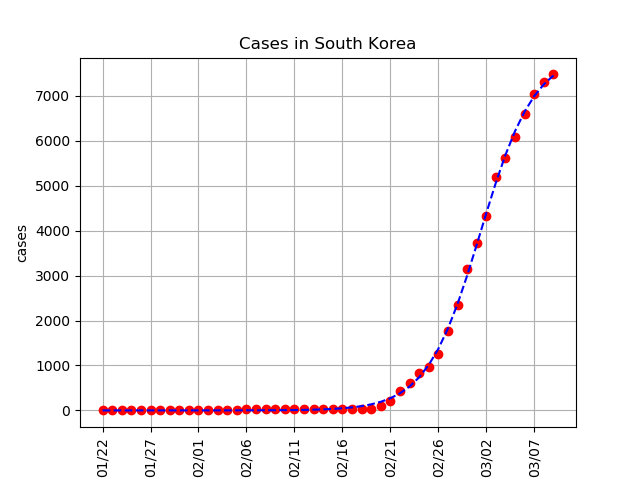

In [7]:
from scipy.optimize import curve_fit

#Define the logistic function
def logistic_function(x, L, x0, k):
  fx = L/(1+np.exp(-k*(x-x0)))
  return fx

#Optimize the logistic function.
#My personal gut feeling for the bounds (could be wrong!!)
#       Seeing as china plateaued under 100k, the L variable shouldn't be more than this
#       The x0 bound is really easy. It should be roughly double your current amount of data (we have 50 days here, hence 100)
#       The k bound is tricky, but it seems as though setting it larger doesn't change the beaviour, so I think it should be 0<k<1
p_opt, p_cov = curve_fit(logistic_function, x, y, bounds=(0,[100000,100,1]))

#Plot the data, and also the logistic function with the three fit parameters
fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.plot(x, logistic_function(x, p_opt[0], p_opt[1], p_opt[2]), 'b--')

ax.set_xticks(np.arange(0, 50, 5))
ax.set_xticklabels(['01/22','01/27','02/01','02/06','02/11','02/16','02/21','02/26','03/02','03/07','03/12','03/17','03/22','03/27','04/01','04/06', '04/11', '04/16','04/21','04/26','05/01'])
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('cases')
plt.grid(b=True)
plt.title('Cases in ' + country1_choice)

display(fig)

### Part 4 - Read in Data from Germany

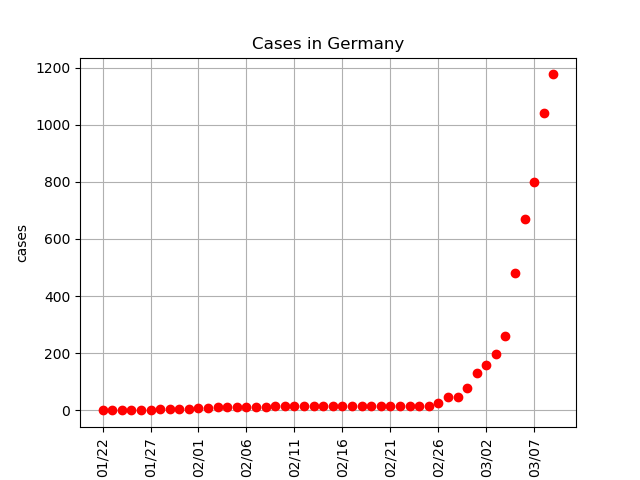

In [9]:
#Choose another country to extrapolate. Note that these countries should be similar! For example I tried to project the fit of China to Germany, and it gives a really pessimistic fit saying we would also get to many tens of thousands of cases. This also doesn't work with countries where the number of cases is very low (for example, if you try projecting the fit from South Korea to Canada or Slovenia, you get a really pessimistic outlook, at least as of march 10th)
country2_choice = 'Germany'

#Sum the cases and turn it into an array
country2 = df.drop('Province/State','Country/Region','Lat','Long').filter(col('Country/Region') == country2_choice).groupBy().sum()
country2_data = np.array(country2.collect())[0]

#Plot the data
x = np.arange(0, len(country2_data))
y = country2_data

fig, ax = plt.subplots()
ax.plot(x, y, 'ro')

ax.set_xticks(np.arange(0, 50, 5))
ax.set_xticklabels(['01/22','01/27','02/01','02/06','02/11','02/16','02/21','02/26','03/02','03/07','03/12','03/17','03/22','03/27','04/01','04/06', '04/11', '04/16','04/21','04/26','05/01'])
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('cases')
plt.grid(b=True)
plt.title('Cases in ' + country2_choice)

display(fig)

### Part 5 - Scale the Previous Fit to Match German Data

We only adjust the L and x0 value in the logistic_loss function defined above (only allow max case variation and horizontal shifting, but not change in the steepness).

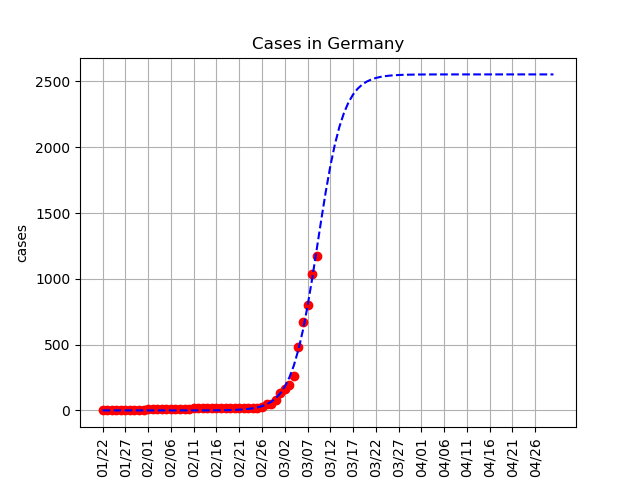

In [11]:
#In this logistic function we take the k value from the previous fit
def logistic_function2(x, L, x0):
  fx = L/(1+np.exp(-p_opt[2]*(x-x0)))
  return fx

#This time we don't vary the k value. Justification for the bounds is the same as above
p2_opt, p2_cov = curve_fit(logistic_function2, x, y, bounds=(0,[100000,100]))

#Plot the data
fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
x2 = np.arange(0, 100)
ax.plot(x2, logistic_function2(x2, p2_opt[0], p2_opt[1]), 'b--')

ax.set_xticks(np.arange(0, len(x2), 5))
ax.set_xticklabels(['01/22','01/27','02/01','02/06','02/11','02/16','02/21','02/26','03/02','03/07','03/12','03/17','03/22','03/27','04/01','04/06', '04/11', '04/16','04/21','04/26','05/01'])
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('cases')
plt.grid(b=True)
plt.title('Cases in ' + country2_choice)

display(fig)